### 객체 그래프 꾸미기

- 객체에 set_title() 메소드를 적용하여 제목 추가 
- set_xlabel() 메소드는 x축 이름 지정
- set_ylabel() 메소드는 y축 이름 지정 
- tick_params() 메소드로 축 눈금 라벨의 크기 조절

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc 
font_path = 'C:\\Users\\jswoo\\Desktop\\Repository\\Study_Data_Science\\Pandas_Data_Analytics\\Part04\\malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family = font_name)

path = 'C:\\Users\\jswoo\\Desktop\\Repository\\Study_Data_Science\\Pandas_Data_Analytics\\Part04\\시도별 전출입 인구수.xlsx'
df = pd.read_excel(path, header =0, engine='openpyxl')

df = df.fillna(method='ffill')

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace =True)
df_seoul.set_index('전입지', inplace=True)

sr_one = df_seoul.loc['경기도']

plt.style.use('ggplot')

c:\Users\jswoo\Desktop\Repository\Study_Data_Science\venv\lib\site-packages\ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


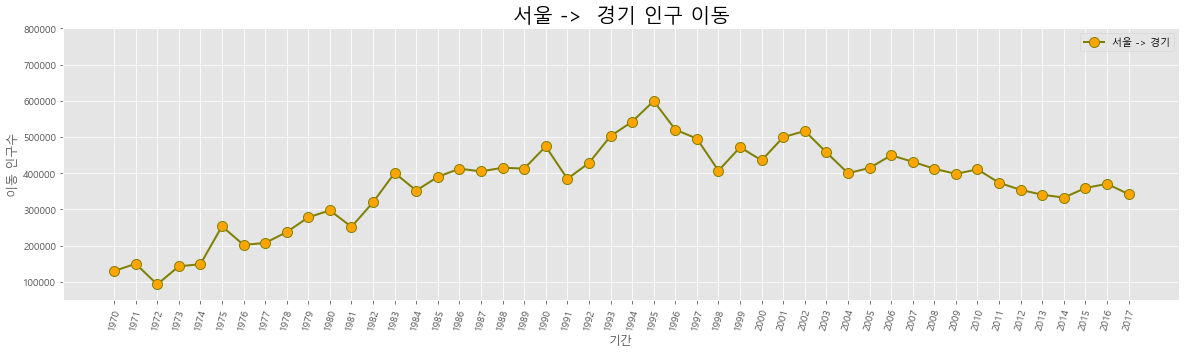

In [4]:
fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(1,1,1)

ax.plot(sr_one, marker = 'o', markerfacecolor = 'orange', markersize = 10, 
        color = 'olive', linewidth = 2, label = '서울 -> 경기')
ax.legend(loc = 'best')

ax.set_ylim(50000, 800000)

ax.set_title('서울 ->  경기 인구 이동', size = 20)

ax.set_xlabel('기간', size = 12)
ax.set_ylabel('이동 인구수', size =12)

ax.set_xticklabels(sr_one.index, rotation = 75)

ax.tick_params(axis = "x", labelsize = 10)
ax.tick_params(axis = "y", labelsize = 10)

plt.show()